## 文本数据的读写及操作

### 介绍


在自然语言处理的第一步，我们要面对的是各种各样以不同形式表现的文本数据，比如，有的是纯 txt 文档，有的是存储在 Excel 中的表格数据，还有的是无法直接打开的 pkl 文件等。刚开始接触编程的同学在这里就犯难了，这可怎么把文本数据拿来进行代码层面的操作呢？

事实上，会者不难，针对这些不同类型的数据，可以基于 Python 中的基本功能函数或者调用某些库进行读写以及作一些基本的处理。本实验将介绍一些常见形式文件的操作，相信在学完本实验以后，大家能够非常快速地上手读写及处理大部分类型的文本数据。

#### 知识点

In [ ]:
-  txt 文本数据的读写
-  CSV 及 Excel 文本数据的读写
-  更多的 DataFrame 操作
-  数据规模太大怎么办

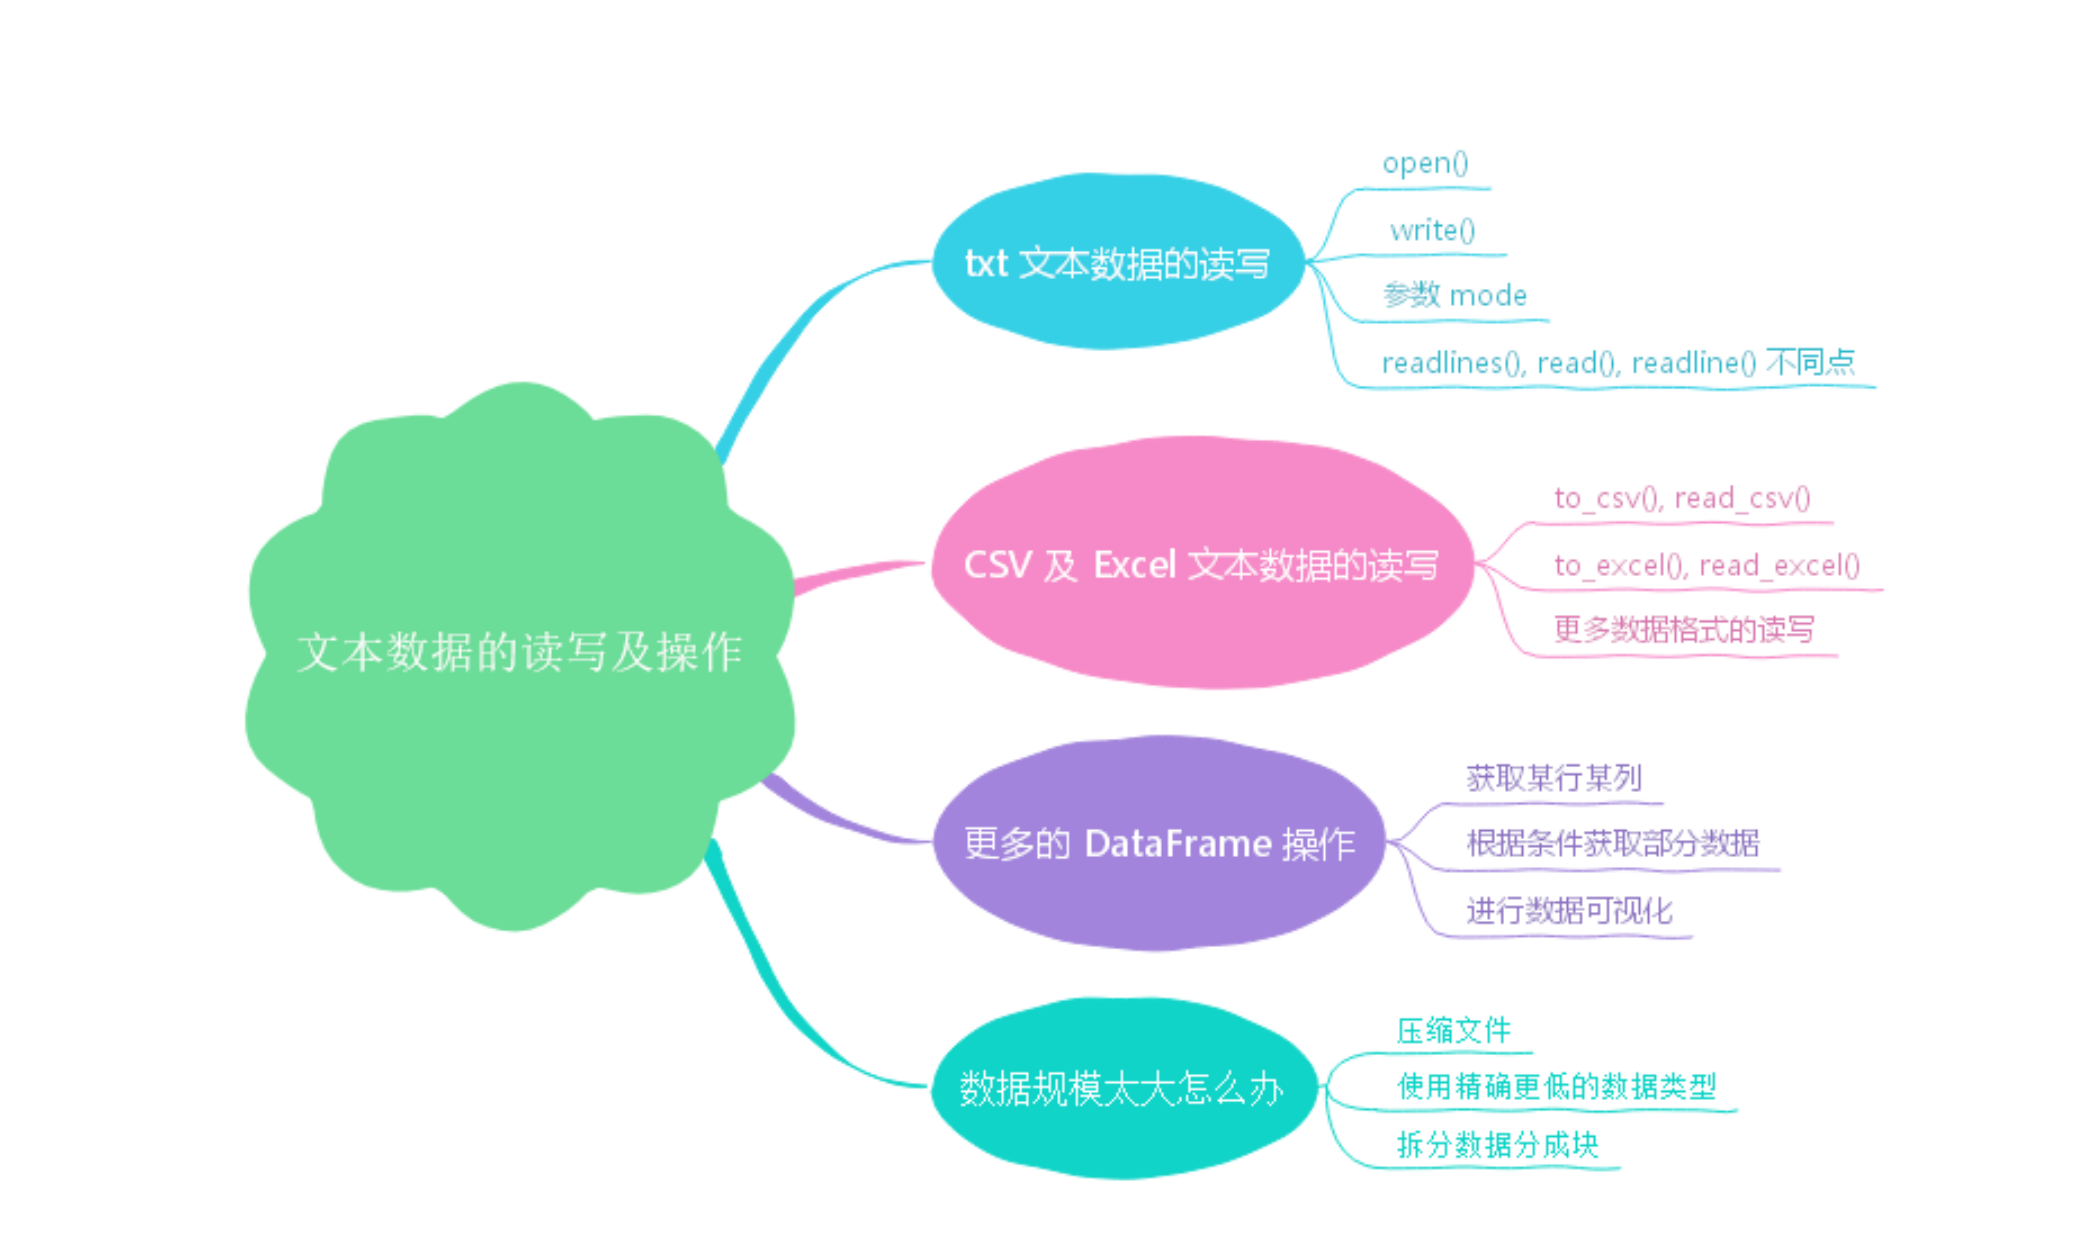

###  txt 文本数据的读写

对于 txt 文本数据，Python 中的内置函数 `open()` 和 `write()` 就可以实现读取或者写入操作。

`open()` 函数用于打开一个文件，创建一个 file 对象，之后，相关的方法才可以调用它进行更多的操作。


- file: 文件路径（相对或者绝对路径）。
- mode: 文件打开模式。
- encoding: 编码格式，一般使用 utf-8。

In [ ]:
其中，mode 决定了打开文件的模式，也就是限定了可以对文件做什么样的操作，比如只读，写入，追加等，这个参数是非强制的，默认文件访问模式为只读 (r)，以下是常用的模式：

- r : 读取文件，若文件不存在则会报错。
- w: 写入文件，若文件不存在则会先创建再写入，若存在则会覆盖原文件。
- a : 写入文件，若文件不存在则会先创建再写入，若存在不会覆盖原文件，而是在文件中继续写入内容。
- rb, wb：分别与 r, w 类似，但用于读写二进制文件。
- r+ : 可读、可写，若文件不存在会报错，在写操作时会覆盖原文件。
- w+ : 可读，可写，文件不存在先创建，若存在会覆盖。
- a+ ：可读、可写，文件不存在先创建，若不存在不会覆盖，在文件中继续写入内容。

注：utf-8（8 位元，Universal Character Set/Unicode Transformation Format）是针对 Unicode 的一种可变长度字符编码。它可以用来表示 Unicode 标准中的任何字符，而且其编码中的第一个字节仍与 ASCII 相容，使得原来处理 ASCII 字符的软件无须或只进行少部份修改后，便可继续使用。因此，它逐渐成为电子邮件、网页及其他存储或传送文字的应用中，优先采用的编码。

接下来应用 `open()` 读取一个 txt 文件，创建一个 file 对象，并应用 `readlines()` 读取相关内容。

首先从线上环境中下载文件：

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/idiom.txt"  # 在win系统中使用 wget.exe 进行下

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习:</i>

读取文件 "idiom.txt" 中的内容并打印出来：

In [ ]:
f = open("idiom.txt","r", encoding="utf-8")
poem = f.readlines()
print(type(poem), poem)  # 从结果可见，readlines() 方法会返回一个 list，包含所有的行，每一行为 list 中的一个元素

通过以上的小练习，我们知道了 `readlines()` 方法的特点是，每次按行读取整个文件内容，将读取到的内容放到一个列表中，返回 list 类型。事实上，还存在另外两种读取方法：

- `read()`：读取整个文件，将文件内容放到一个 str 类型的变量中，但是，如果文件非常大，尤其是大于内存时，无法使用 `read()` 方法。
- `readline()`：每次只读取文件的一行，即读取到的一行内容放到一个字符串变量中，返回 str 类型。可以在文件过大，内存不够时使用。

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/poem.txt"

`read()` 方法：

In [ ]:
f = open("poem.txt","r", encoding="utf-8")
poem = f.read()
print(type(poem), poem)  # 返回的是一个包含所有内容的 str 类型的变量

`readline()` 方法：

In [ ]:
f = open("poem.txt","r", encoding="utf-8")
while True:
    poem_line = f.readline()
    if poem_line:
        print(type(poem_line), poem_line)  # 分次返回每一行
    else:
        break

以上利用 `open()` 函数实现了 txt 文件的读取，接下来，我们希望应用 `write()` 函数，实现写入一个 txt 文件。

In [ ]:
# 将一些俗语写入至文件 idiom.txt 中
idiom = ["路遥知马力，日久见人心。", "千学不如一看，千看不如一练。", "岁寒知松柏，患难见交情。"]
f = open('idiom.txt', 'w', encoding='utf-8')
for text in idiom:
    f.write(text)
    f.write("\n")  # 注意每写一句要换行一次，否则所有文字会粘在一行中

写入文件之后，我们可以通过 Linux 命令查看当前目录下是否存在相应文件。

In [2]:
!ls

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


有时候，我们希望在一个已存在的 txt 文件中，继续写入东西，这时候 mode 要选择 “a”，如果选择 “w”，新写入的内容会覆盖原来的内容。

In [ ]:
f = open('idiom.txt', 'a', encoding='utf-8')
f.write("好好学习，天天向上。")

你也可尝试使用 “w”，观察文件内容发生了什么变化。

### CSV 及 Excel 文本数据的读写

首先，在这里给大家介绍 Pandas，这是一个功能强大且灵活的 Python 软件包，具有读写 Excel，CSV 以及更多其他类型文件的能力，另外，它还提供统计方法，绘图等功能。在接下来的教程中，我们基于 Pandas 对不同类型的文件数据进行操作。

对于 CSV 类型的文件，可调用 Pandas 中的 to_csv() 以及 read_csv() 函数，轻松实现写入或者读取。

In [ ]:
import pandas as pd
# 这是我们的数据
data = {
    'CHN': {'COUNTRY': 'China', 'POP': 1_398.72, 'AREA': 9_596.96,
            'GDP': 12_234.78, 'CONT': 'Asia'},
    'IND': {'COUNTRY': 'India', 'POP': 1_351.16, 'AREA': 3_287.26,
            'GDP': 2_575.67, 'CONT': 'Asia', 'IND_DAY': '1947-08-15'},
    'USA': {'COUNTRY': 'US', 'POP': 329.74, 'AREA': 9_833.52,
            'GDP': 19_485.39, 'CONT': 'N.America',
            'IND_DAY': '1776-07-04'},
    'IDN': {'COUNTRY': 'Indonesia', 'POP': 268.07, 'AREA': 1_910.93,
            'GDP': 1_015.54, 'CONT': 'Asia', 'IND_DAY': '1945-08-17'},
    'BRA': {'COUNTRY': 'Brazil', 'POP': 210.32, 'AREA': 8_515.77,
            'GDP': 2_055.51, 'CONT': 'S.America', 'IND_DAY': '1822-09-07'},
    'PAK': {'COUNTRY': 'Pakistan', 'POP': 205.71, 'AREA': 881.91,
            'GDP': 302.14, 'CONT': 'Asia', 'IND_DAY': '1947-08-14'},
    'NGA': {'COUNTRY': 'Nigeria', 'POP': 200.96, 'AREA': 923.77,
            'GDP': 375.77, 'CONT': 'Africa', 'IND_DAY': '1960-10-01'},
    'BGD': {'COUNTRY': 'Bangladesh', 'POP': 167.09, 'AREA': 147.57,
            'GDP': 245.63, 'CONT': 'Asia', 'IND_DAY': '1971-03-26'},
    'RUS': {'COUNTRY': 'Russia', 'POP': 146.79, 'AREA': 17_098.25,
            'GDP': 1_530.75, 'IND_DAY': '1992-06-12'},
    'MEX': {'COUNTRY': 'Mexico', 'POP': 126.58, 'AREA': 1_964.38,
            'GDP': 1_158.23, 'CONT': 'N.America', 'IND_DAY': '1810-09-16'},
    'JPN': {'COUNTRY': 'Japan', 'POP': 126.22, 'AREA': 377.97,
            'GDP': 4_872.42, 'CONT': 'Asia'},
    'DEU': {'COUNTRY': 'Germany', 'POP': 83.02, 'AREA': 357.11,
            'GDP': 3_693.20, 'CONT': 'Europe'},
    'FRA': {'COUNTRY': 'France', 'POP': 67.02, 'AREA': 640.68,
            'GDP': 2_582.49, 'CONT': 'Europe', 'IND_DAY': '1789-07-14'},
    'GBR': {'COUNTRY': 'UK', 'POP': 66.44, 'AREA': 242.50,
            'GDP': 2_631.23, 'CONT': 'Europe'},
    'ITA': {'COUNTRY': 'Italy', 'POP': 60.36, 'AREA': 301.34,
            'GDP': 1_943.84, 'CONT': 'Europe'},
    'ARG': {'COUNTRY': 'Argentina', 'POP': 44.94, 'AREA': 2_780.40,
            'GDP': 637.49, 'CONT': 'S.America', 'IND_DAY': '1816-07-09'},
    'DZA': {'COUNTRY': 'Algeria', 'POP': 43.38, 'AREA': 2_381.74,
            'GDP': 167.56, 'CONT': 'Africa', 'IND_DAY': '1962-07-05'},
    'CAN': {'COUNTRY': 'Canada', 'POP': 37.59, 'AREA': 9_984.67,
            'GDP': 1_647.12, 'CONT': 'N.America', 'IND_DAY': '1867-07-01'},
    'AUS': {'COUNTRY': 'Australia', 'POP': 25.47, 'AREA': 7_692.02,
            'GDP': 1_408.68, 'CONT': 'Oceania'},
    'KAZ': {'COUNTRY': 'Kazakhstan', 'POP': 18.53, 'AREA': 2_724.90,
            'GDP': 159.41, 'CONT': 'Asia', 'IND_DAY': '1991-12-16'}
}

columns = ('COUNTRY', 'POP', 'AREA', 'GDP', 'CONT', 'IND_DAY')
# 需要应用 DataFrame 构造函数将 data 创建一个 DataFrame 对象，才能写入文件
df = pd.DataFrame(data=data)

In [ ]:
df  # 查看数据

以上形式看着比较别扭，接下来，我们对 DataFrame 进行转置变换：

In [ ]:
# 将数据进行转置
df = df.T
df

In [ ]:
接下来，应用 `to_csv()` 将以上内容写入一个 CSV 文件中。

In [ ]:
df.to_csv('20_country.csv', encoding="utf-8")  # 写入 CSV 文件

应用 `read_csv()` 则可以读取刚刚生成的 CSV 文件。

In [ ]:
# 读取 CSV 文件
# 使用 index_col = 0，表示直接将第一列作为索引
df = pd.read_csv('20_country.csv', index_col=0)
df

对于 Excel 文件，如法炮制，调用 Pandas 中的 `to_excel()` 以及 `read_excel()` 函数，轻松实现写入或者读取。如果我们操作的对象是以 .xlsx 为后缀的 Excel 文件，还需要安装库 openpyxl，线上环境已经预装了 openpyxl。

In [ ]:
# read_excel() 则可以读取 csv 文件
df = pd.read_excel('20_country.xlsx', index_col=0)
df

In [ ]:
通过以上的例子，相信大家都已经发现，如果想将 DataFrame 对象写入某一格式的文件，应用 Pandas 库中  `to_<file-type>()` 形式的函数就可以了，比如上述的 `to_csv()` 和 `to_excel()`，当然，还包括更多其它的文件形式：

In [ ]:
- `to_json()`
- `to_html()`
- `to_sql()`
- `to_pickle()`

In [ ]:
对于不同类型文件的读取，同理可得：

In [ ]:
- `read_json()`
- `read_html()`
- `read_sql()`
- `read_pickle()`

### 更多的 DataFrame 操作

很多时候，我们完成了文件中的数据读取，转换为 DataFrame 形式之后，需要进行一系列的数据处理操作，比如获取某行某列，根据条件获取部分数据，进行数据可视化等等。接下来的部分将为大家介绍一些常见的基于 DataFrame 的操作。

使用 `loc[]` 可以获取具有指定行和列名称的数据。

In [ ]:
df.loc["CHN", "POP"]

直接根据列名来获取某列。

In [ ]:
df["POP"]

也可以根据列名来获取多列。

In [ ]:
df[["POP", "GDP"]]

根据 `iloc[]` 获取某一行。

In [ ]:
df.iloc[[1],]

获取某几行。

In [ ]:
df.iloc[[1, 4], ]

取某几行，某几列。

In [ ]:
df.iloc[[0, 2], [1, 2, 3]]

根据条件获取数据，如获取亚洲国家对应的数据。

In [ ]:
df.loc[df["CONT"] == "Asia"]

若需要满足多个条件，用 & 连接即可。

In [ ]:
df.loc[(df["CONT"] == "Asia") & (df["GDP"] > 1000)]  # 注意 & 左右两边的条件要加上（），否则报错

直接应用 DataFrame 中的 `plot()` 函数可以对数值类型的列进行画图。

In [ ]:
df.plot.bar()

也可以只选取其中的某部分感兴趣的数据进行画图。

In [ ]:
df["POP"].plot.bar()  # 各国家的人口对比

### 数据规模太大怎么办

### 数据规模太大怎么办有时候在数据预处理过程中，我们会遇到大型文件，比如某部长篇小说都存放在一个 txt 文件中，如果文件太大，无法直接保存或处理，则可以采用以下几种方法来减少所需的磁盘空间：

- 压缩文件。
- 使用精确更低的数据类型。
- 拆分数据分成块。

压缩文件：在保存文件时，添加一个与所需压缩类型相对应的后缀，比如：

压缩文件：在保存文件时，添加一个与所需压缩类型相对应的后缀，比如：

- '.gz'
- '.bz2'
- '.zip'
- '.xz'

压缩为以 ".zip" 为后缀的文件。

In [ ]:
df.to_csv("20_country.csv.zip")

使用精确更低的数据类型：在可以接受不太精确的数据类型的情况下，转换数据类型可以节省大量内存。

In [ ]:
df = pd.read_excel("20_country.xlsx", index_col=0)


具有浮点数的列是 64 位浮点数。此类型的每个数字 float64 消耗 64 位或 8 个字节。每列有 20 个数字，需要 160 个字节。

In [ ]:
df.memory_usage()

通过将将 float64 浮点数存为 float32 浮点数，以节省内存。

In [ ]:
dtypes = {'POP': 'float32', 'AREA': 'float32', 'GDP': 'float32'}


转换后的数值部分可以节省内存，从 160 个字节变为 80 个字节。

In [ ]:
df.memory_usage()

拆分数据分成块：处理超大型数据集的另一种方法是将数据分成较小的块，然后一次处理一个块，参数 chunksize，默认为 None，可以传入一个整数值指明块的数量。

In [ ]:
data_chunk = pd.read_csv("20_country.csv", index_col=0, chunksize=8)
print(type(data_chunk))
print(hasattr(data_chunk, '__iter__'))
print(hasattr(data_chunk, '__next__'))


当 chunksize 为整数时，`read_csv()` 返回一个可迭代的变量，可以在 for 循环中使用该可迭代的变量，以在每次迭代中仅获取和处理数据集的一部分，这样就能够控制处理一次数据所需的内存量，并将其保持在合理的程度。

In [ ]:
for df_chunk in pd.read_csv('20_country.csv', index_col=0, chunksize=8):
    print(df_chunk, end='\n\n')  # 每次迭代一部分
    print('memory:', df_chunk.memory_usage().sum(),
          'bytes', end='\n\n\n')  # 查看所占内存

在上述例子中，chunksize 是 8，因此 for 循环的第一次迭代仅返回 DataFrame 数据集的前 8 行，第二次迭代将返回接下来的 8 行，第三次也是最后一次迭代将返回其余 4 行。在每次迭代中，获得 DataFrame 行数等于 chunksize。当前，在最后一次迭代中，行数可能少于 chunksize，因为 DataFrame 的总行数不一定能够被 chunksize 整除。

### 实验总结

在本实验中，我们主要介绍了对于不同类型文件的读写以及后续的操作处理，包括以下知识点：

-  txt 文本数据的读写
-  CSV 及 Excel 文本数据的读写
-  更多的 DataFrame 操作
-  数据规模太大怎么办

相信通过本次实验的学习，同学们可以游刃有余地面对各种数据文件了。在接下来的实验中，我们将开始真正地开启自然语言处理之旅，开始认识并熟悉一些常见的针对文本本身的预处理操作。